# **Jobsheet 7: Clustering**

## **Praktikum 1 - Klasifikasi Iris dengan Perceptron**

### **Langkah 1 - Import Library**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **Langkah 2 - Load Data dan Visualisasi**

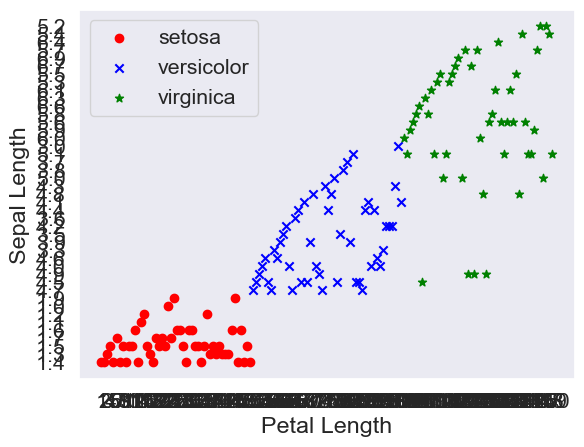

In [46]:
df = pd.read_csv('datasets/Iris.csv', header=None)
# df.info()
setosa = df[df[5] == 'Iris-setosa']
versicolor = df[df[5] == 'Iris-versicolor']
virginica = df[df[5] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')
plt.scatter(virginica[a], virginica[b], color='green', marker='*', label='virginica')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Proses plotting data panjang petal berdasarkan 3 kelompok

### **Langkah 3 - Membuat Kelas Perceptron**

In [4]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Membuat fungsi perceptron yang nantinya akan digunakan untuk memprediksi cluster

### **Langkah 4 - Pilih Data dan Encoding Label**

In [5]:
y = df.iloc[1:100, 5].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[1:100, [1, 3]].values.astype(float)

Memilih data yang akan dijadikan feature dan label, seharusnya untuk unsupervised learning kita tidak membutuhkan target karena nantinya model itu sendiri yang akan mengklasterkan

### **Langkah 5- Fitting Model**

In [6]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

Fitting model perceptron

### **Langkah 6 - Visualisasi Nilai Error Per Epoch**

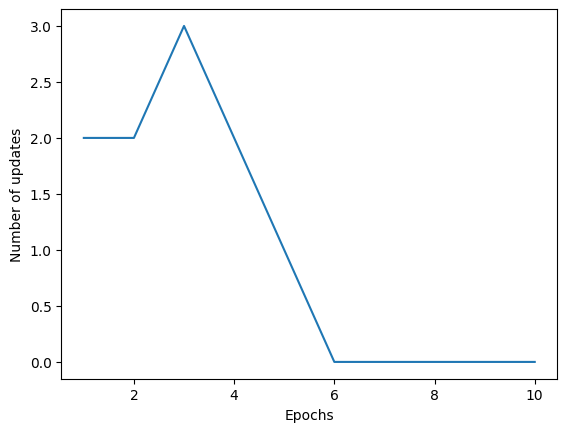

In [7]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### **Langkah 7 - Visualisasi Decision Boundary**

In [8]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_15652\3924338356.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


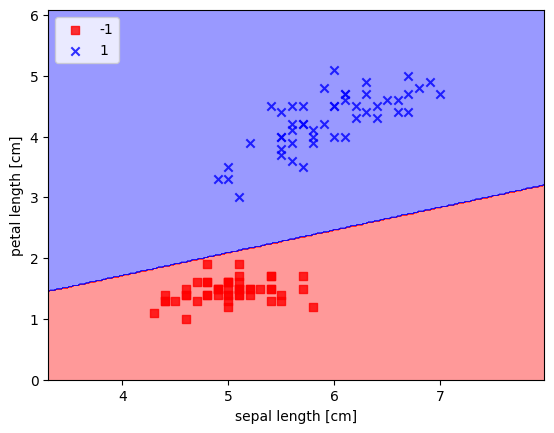

In [9]:
plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Pengelompokan hasil fitting model perceptron, terlihat ada dua kelompok data yang terpisah berdasarkan panjang petalnya

## **Praktikum 2 - Klasifikasi Berita dengan Perceptron**

### **Langkah 1 - Import Library**

In [10]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

### **Langkah 2 - Pilih Label dan Split Data**

In [11]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('header', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

Membuat array kategori berita yaitu olahraga hockey, olahraga baseball, dan berita selainnya, kemudian membagi dataset dari sklearn menjadi train data dan test data.

### **Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron**

In [12]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       396
           1       0.87      0.82      0.85       397
           2       0.89      0.87      0.88       399

    accuracy                           0.87      1192
   macro avg       0.87      0.87      0.87      1192
weighted avg       0.87      0.87      0.87      1192



Ekstraksi fitur menggunakan Text feature vectorizer, lalu membuat model perceptron dan melakukan fitting model menggunakan data X_train dan newsgroups_train.target. Proses akhirnya adalah evaluasi hasil model.

## **Praktikum 3 - Nilai Logika XOR dengan MLP**

### **Langkah 1 - Import Library**

In [13]:
from sklearn.neural_network import MLPClassifier

Import Multi Perceptron Classifier

### **Langkah 2 - Buat Data**

In [14]:
y = [0, 1, 1, 0]
X = [[0, 0], [0, 1], [1, 0], [1, 1]]

### **Langkah 3 - Fit Model**

In [15]:
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

Membuat model MLPClassifier dengan algorithma solver lbfgs, activation logistic, 2 hidden layer, dan lain sebagainya serta proses fitting.

### **Langkah 4 - Prediksi**

In [16]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i, p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


Proses prediksi dari model yang sudah difitting, hasilnya 100 akurasi.

## **Praktikum 4 - Klasifikasi dengan ANN**

### **Langkah 1 - Import Library**

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf

### **Langkah 2 - Load Data**

In [18]:
dataset = pd.read_csv('datasets/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Load dataset Churn_Modelling

In [19]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


### **Langkah 3 - Encoding Data Kategorikal**

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

Melakukan standarisasi terhadap data X menggunakan LabelEncoder

### **Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder**

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Melakukan One hot encoder untuk nilai dari setiap kolom yang disimpan di X.

### **Langkah 5 - Split Data**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Proses splitting data train dan test.

### **Langkah 6 - Scaling Fitur**

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Melakukan standarisasi nilai kolom yang berupa angka menggunakan StandardScaler.

### **Membuat Model ANN**
### **Langkah 1 - Inisiasi Model ANN**

In [24]:
ann = tf.keras.models.Sequential()

Membuat "kerangka" dari model ANN menggunakan Sequential

### **Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama**

In [25]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Menambahkan layer pertama dengan 6 units dan activation relu.

### **Langkah 3 - Membuat Hidden Layer Kedua**

In [26]:
ann.add(tf.keras.layers.Dense(units = 6, activation='relu'))

Sama seperti langkah sebelumnya

### **Langkah 4 - Membuat Output Layer**

In [27]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Membuat final layer dengan 1 neural unit dan activation sigmoid untuk menghasilkan hasil akhir 0 atau 1

### **Training Model**
### **Langkah  1 - Compile Model (Menyatukan Arsitektur) ANN**

In [28]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Setelah proses pembuatan layer neural network, layer tersebut harus dicompile terlebih dahulu.

### **Langkah  2 - Fitting Model**

In [29]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 737us/step - loss: 0.6340 - accuracy: 0.6689
Epoch 2/100
250/250 [==============================] - 0s 854us/step - loss: 0.4820 - accuracy: 0.7954
Epoch 3/100
250/250 [==============================] - 0s 715us/step - loss: 0.4506 - accuracy: 0.7974
Epoch 4/100
250/250 [==============================] - 0s 675us/step - loss: 0.4296 - accuracy: 0.8102
Epoch 5/100
250/250 [==============================] - 0s 698us/step - loss: 0.4146 - accuracy: 0.8227
Epoch 6/100
250/250 [==============================] - 0s 654us/step - loss: 0.4031 - accuracy: 0.8284
Epoch 7/100
250/250 [==============================] - 0s 696us/step - loss: 0.3927 - accuracy: 0.8350
Epoch 8/100
250/250 [==============================] - 0s 653us/step - loss: 0.3825 - accuracy: 0.8403
Epoch 9/100
250/250 [==============================] - 0s 786us/step - loss: 0.3734 - accuracy: 0.8443
Epoch 10/100
250/250 [==============================] - 0s 666us/step - l

Proses fitting

### **Membuat Prediksi**

#### **Modelkan Data Baru dan Buat Prediksi**

In [30]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 80ms/step
[[False]]


### **Prediksi Dengan Data Testing**

In [31]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

63/63 [==============================] - 0s 523us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### **Cek Akurasi dan Confusion Matrix**

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1517   78]
 [ 204  201]]


0.859

## **Tugas**


* Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

* Anda diperbolehkan melakukan eksplorasi terhadap,
    * Metode pra pengolahan
    * Pemilihan fitur
    * Arsitektur ANN
    * Fungsi Aktiviasi

* ANN diimplementasikan dengan menggunakan tensorflow.

* DIKERJAKAN SECARA BERKELOMPOK

* JELASKAN HASIL YANG ANDA DAPATKAN,
    * AKURASI
    * CONFUSION MATRIX
    * KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [34]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

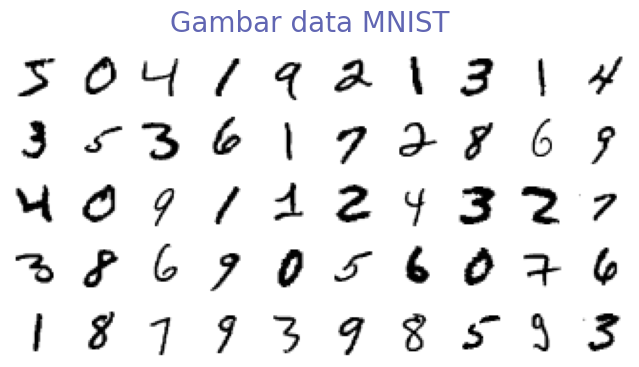

In [35]:
# Menampilkan gambar dari data MNIST
fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize=(8,4), subplot_kw={'xticks': [], 'yticks': []})
for row in range(0,5):
    for col in range(0,10):
        myid = (10*row) + col # (ncols*rows) + cols

        ax[row,col].imshow( x_train[myid], cmap=plt.cm.binary ) # W,H,C
        ax[row,col].axis('off')

plt.suptitle("Gambar data MNIST", size=20, color="#6166B3")

plt.show()

In [36]:
print("bentuk data: ",x_train.shape)
print("nilai max data: ",x_train[0].max())
print("bentuk data: ",x_test.shape)
print("nilai max data: ",x_test[0].max())

bentuk data:  (60000, 28, 28)
nilai max data:  255
bentuk data:  (10000, 28, 28)
nilai max data:  255


In [37]:
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255

# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

bentuk data setelah:  (60000, 784)
nilai max data setelah:  1.0


In [38]:
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test , num_classes=10)

In [39]:
# pembuatan hidden layer
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,MaxPool2D,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Concatenate,UpSampling2D
from tensorflow.keras.models import Model

nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(10, activation='softmax'))
print(nn_model)

In [40]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
history = nn_model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 2s 840us/step - loss: 0.5367 - accuracy: 0.8388
Epoch 2/50
1875/1875 [==============================] - 2s 814us/step - loss: 0.3295 - accuracy: 0.9011
Epoch 3/50
1875/1875 [==============================] - 2s 808us/step - loss: 0.2880 - accuracy: 0.9132
Epoch 4/50
1875/1875 [==============================] - 2s 840us/step - loss: 0.2652 - accuracy: 0.9190
Epoch 5/50
1875/1875 [==============================] - 2s 814us/step - loss: 0.2518 - accuracy: 0.9234
Epoch 6/50
1875/1875 [==============================] - 2s 814us/step - loss: 0.2402 - accuracy: 0.9254
Epoch 7/50
1875/1875 [==============================] - 2s 827us/step - loss: 0.2318 - accuracy: 0.9282
Epoch 8/50
1875/1875 [==============================] - 2s 802us/step - loss: 0.2241 - accuracy: 0.9293
Epoch 9/50
1875/1875 [==============================] - 1s 794us/step - loss: 0.2197 - accuracy: 0.9317
Epoch 10/50
1875/1875 [==============================] - 2s 820u

Akurasi terbaik: 0.9482666850090027 pada epoch: 47


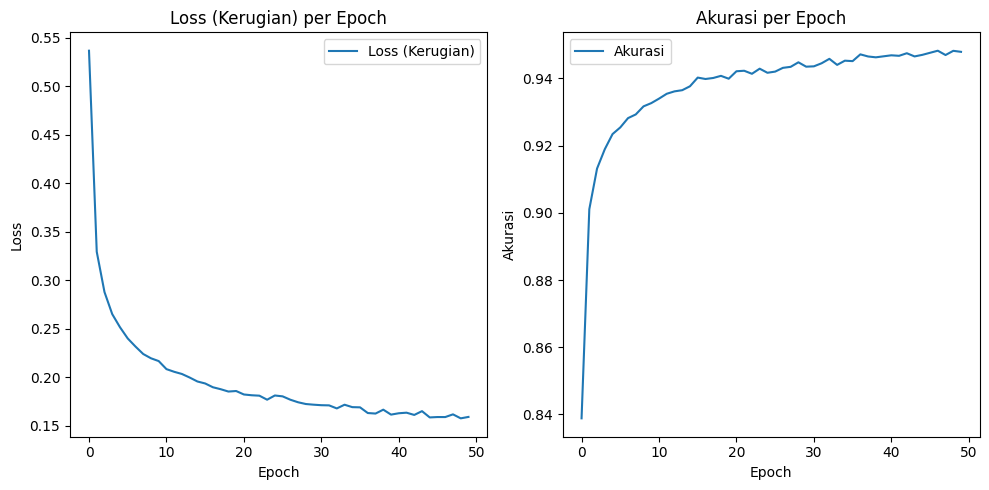

In [42]:
#Akurasi terbaik
best_accuracy = max(history.history['accuracy']) 
best_epoch = history.history['accuracy'].index(best_accuracy) + 1 
print("Akurasi terbaik:", best_accuracy, "pada epoch:", best_epoch)

# Visualisasi loss (kerugian)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss (Kerugian)')
plt.title('Loss (Kerugian) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Visualisasi akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Akurasi')
plt.title('Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
# Menghitung akurasi model pada data pengujian menggunakan prediksi yang dihasilkan sebelumnya
y_prob = nn_model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

313/313 [==============================] - 0s 590us/step


0.9661

In [44]:
# Menghitung confusion matrix berdasarkan label sebenarnya (y_test) dan label prediksi (y_pred)
from sklearn.metrics import confusion_matrix  # for evaluating results
confusion_array = confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion_array

array([[ 970,    0,    1,    1,    1,    3,    2,    1,    1,    0],
       [   0, 1120,    6,    2,    0,    0,    2,    1,    4,    0],
       [   5,    1,  993,    5,    3,    3,    3,    8,   11,    0],
       [   0,    0,    7,  978,    0,   10,    0,   10,    3,    2],
       [   3,    0,    2,    1,  949,    0,   10,    2,    1,   14],
       [   3,    0,    1,   12,    3,  849,    8,    4,    9,    3],
       [   6,    4,    2,    0,    3,    6,  931,    0,    6,    0],
       [   2,   10,   10,    5,    2,    0,    0,  988,    4,    7],
       [   6,    1,    3,   11,    6,   10,    4,    8,  923,    2],
       [   5,    3,    0,   12,   13,    9,    0,    6,    1,  960]],
      dtype=int64)

<Axes: >

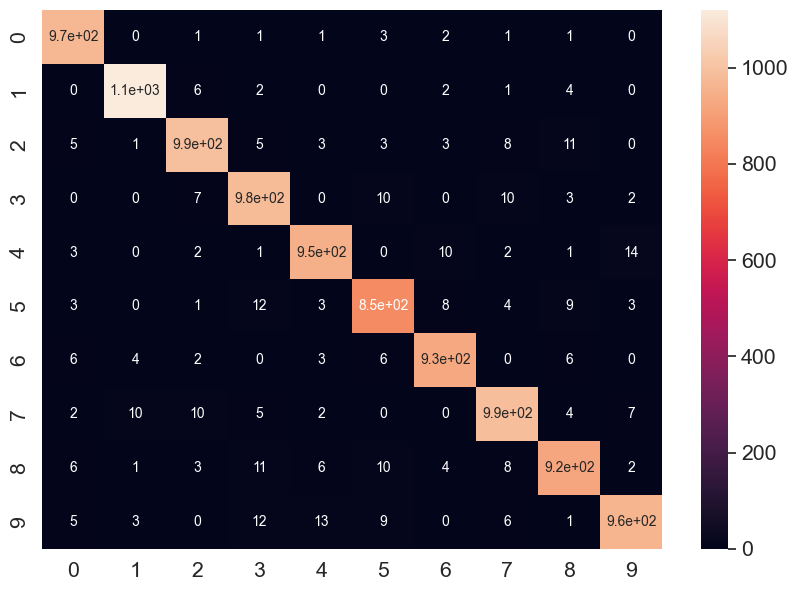

In [45]:
# Membuat visualisasi Confusion Matrix
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(confusion_array, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size